# Importing the pandas ,seaborn and matplotlib librararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Sales dataset

In [2]:
data=pd.read_csv("Add_sales_data_2018.csv")
data.head(5)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

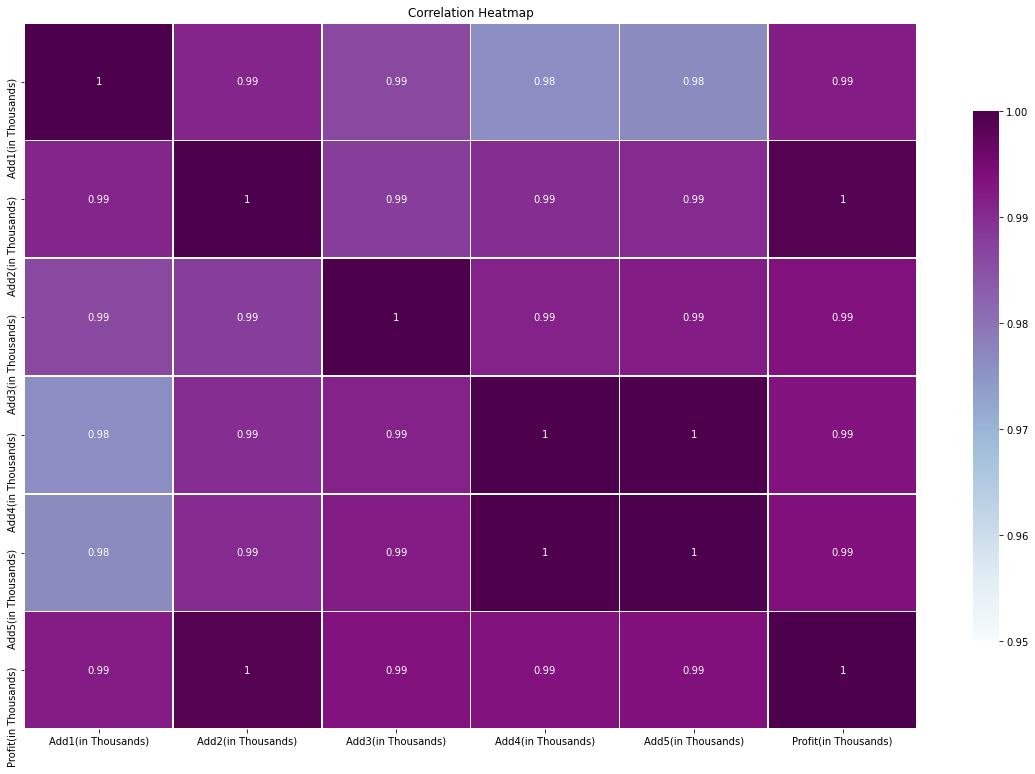

In [4]:
plt.figure(figsize = (20,13))
sns.heatmap(data.corr(),vmin=0.95,vmax=1,annot=True,cmap='BuPu',linewidth=.75, cbar_kws={'shrink': .75})
plt.title('Correlation Heatmap')
plt.savefig('corr_raw.png')

From this correlation heatmap it is observed that there is a positive correlation between the amount spent for advertising by five different companies and their profit that is the values are closer to 1, so when one value increases the other value also increases.It symbolises a stronger relationship.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.


In [5]:
x=data.drop(['Date', 'Profit(in Thousands)'],axis=1)
y=data['Profit(in Thousands)']             

Here we are assigining independant variables to x and depandant variable to y.

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Here we are spliting the data for training and testing for prediction.That is 70% for training and 30% for testing

# Building Linear regression model

In [57]:
from sklearn.linear_model import LinearRegression
lm1=LinearRegression()
lm1.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred=lm1.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

1.8811688124189825e-24

In [60]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

1.0

# Building Lasso model¶

In [61]:
from sklearn.linear_model import Lasso
lm2=Lasso()
lm2.fit(x_train,y_train)

y_pred1=lm2.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred1,y_test)

0.5927008045654794

In [63]:
from sklearn.metrics import r2_score
r2_score(y_pred1,y_test)

0.9999971309433194

Here we have used linear regression model and lasso model,Linear regression model have outperformed lasso model with a MSE value Of 1.8811688124189825e-24 and r2_score of 1.0.Here the metrics used for evaluating the performance of algorithms include  mean_squared_error and r2_score.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.


Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320

In [64]:
lm1.predict(np.array([[290, 312,309,298,320]]))

array([5820.06])

Here the profit is 5820